# Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dqn import QAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2')

In [3]:
# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
epsilon_decay = 0.99995
epsilon_min = 0.01
memory_size = 50_000
episodes = 1
batch_size = 32

In [4]:
# define and train agent
agent = QAgent(state_size = state_size, 
               action_size = action_size,
               epsilon_decay = epsilon_decay,
               epsilon_min = epsilon_min,
               memory_size = memory_size)

returns = agent.training(env, episodes = episodes, batch_size = batch_size)

# save results
np.save('returns.npy', np.array(returns))

Episode 1/1 - Reward: -29.14 - Epsilon: 0.96


In [10]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 100 episodes: {np.mean(returns[-100: ])}')

Average return: -29.13864462908269
Average return last 100 episodes: -29.13864462908269


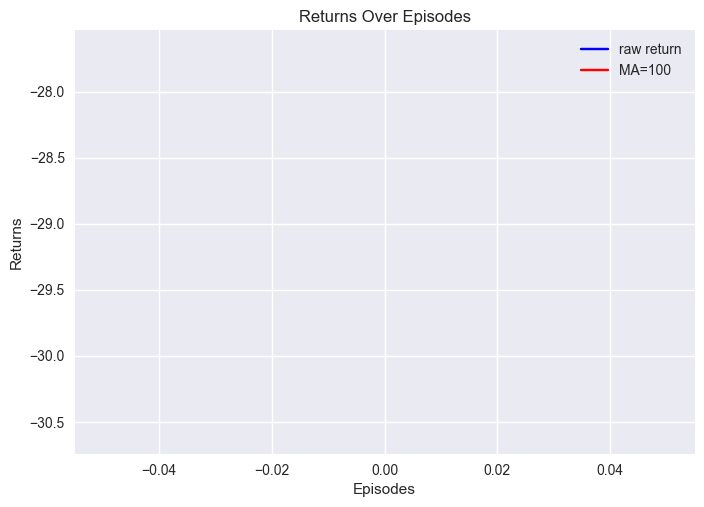

In [19]:
# plt.style.use('seaborn')
MA = 100
plt.plot(returns, label='raw return', color='blue')
plt.plot(pd.Series(returns).rolling(MA).mean(), label=f'MA={MA}', color='red')
plt.ylabel('Returns')
plt.xlabel('Episodes')
plt.title('Returns Over Episodes')
plt.legend()